# Plots for the product of complex Gaussian matrices

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
import time, pickle
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
gammas = [0.5, 1.0, 1.5]
alphas_se = [None for gamma in gammas]
mses_uninformed_x, mses_uninformed_z, mses_informed_z, mses_informed_x = [None for gamma in gammas], [None for gamma in gammas], [None for gamma in gammas], [None for gamma in gammas]
alphas_gvamp = [None for gamma in gammas]
mses_gvamp_mean_all_z, mses_gvamp_std_all_z, mses_gvamp_mean_all_x, mses_gvamp_std_all_x  = [None for gamma in gammas], [None for gamma in gammas], [None for gamma in gammas], [None for gamma in gammas]
mses_gvamp_mean_converged_only_z, mses_gvamp_std_converged_only_z, mses_gvamp_mean_converged_only_x, mses_gvamp_std_converged_only_x  = [None for gamma in gammas], [None for gamma in gammas], [None for gamma in gammas], [None for gamma in gammas]

In [3]:
#Loading SE data
for (i_g,gamma) in enumerate(gammas):
    if gamma != 1:
        filename = "Data/results_se_complex_product_gaussians_gamma_"+str(gamma)+".pkl"
        infile = open(filename,'rb')
        results = pickle.load(infile)
        infile.close()
        alphas_se[i_g] = results['alphas']
        mses_uninformed = results['mses_uninformed']
        mses_informed = results['mses_informed']
        mses_uninformed_x[i_g] = np.array([mse['x'] for mse in mses_uninformed])
        mses_uninformed_z[i_g] = np.array([mse['z'] for mse in mses_uninformed])
        mses_informed_x[i_g] = np.array([mse['x'] for mse in mses_informed])
        mses_informed_z[i_g] = np.array([mse['z'] for mse in mses_informed])
    else:
        #We separate the case gamma = 1 which was generated in a slightly different way
        alphas_se[i_g] = {'informed':None,'uninformed':None}
        
        filename = "Data/results_se_complex_product_gaussians_gamma_"+str(gamma)+"_uninformed_only.pkl"
        infile = open(filename,'rb')
        results = pickle.load(infile)
        infile.close()
        alphas_se[i_g]['uninformed'] = results['alphas']
        mses_uninformed = results['mses_uninformed']
        mses_uninformed_x[i_g] = np.array([mse['x'] for mse in mses_uninformed])
        mses_uninformed_z[i_g] = np.array([mse['z'] for mse in mses_uninformed])

        filename = "Data/results_se_complex_product_gaussians_gamma_"+str(gamma)+"_informed_only.pkl"
        infile = open(filename,'rb')
        results = pickle.load(infile)
        infile.close()
        alphas_se[i_g]['informed']  = results['alphas']
        mses_informed = results['mses_informed']
        mses_informed_x[i_g] = np.array([mse['x'] for mse in mses_informed])
        mses_informed_z[i_g] = np.array([mse['z'] for mse in mses_informed])

In [4]:
#Loading GVAMP data (once the runs are over)
for (i_g,gamma) in enumerate(gammas):
    filename = "Data/results_gvamp_complex_product_gaussians_gamma"+str(gamma)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()

    alphas_gvamp[i_g] = results['alphas']
    mses_gvamp_mean_all_z[i_g] = results['mses_mean_all_z']
    mses_gvamp_std_all_z[i_g] = results['mses_std_all_z']
    mses_gvamp_mean_all_x[i_g] = results['mses_mean_all_x']/2.
    mses_gvamp_std_all_x[i_g] = results['mses_std_all_x']/2.
    mses_gvamp_mean_converged_only_z[i_g] = results['mses_mean_converged_only_z']
    mses_gvamp_std_converged_only_z[i_g] = results['mses_std_converged_only_z']
    mses_gvamp_mean_converged_only_x[i_g] = results['mses_mean_converged_only_x']/2.
    mses_gvamp_std_converged_only_x[i_g] = results['mses_std_converged_only_x']/2.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


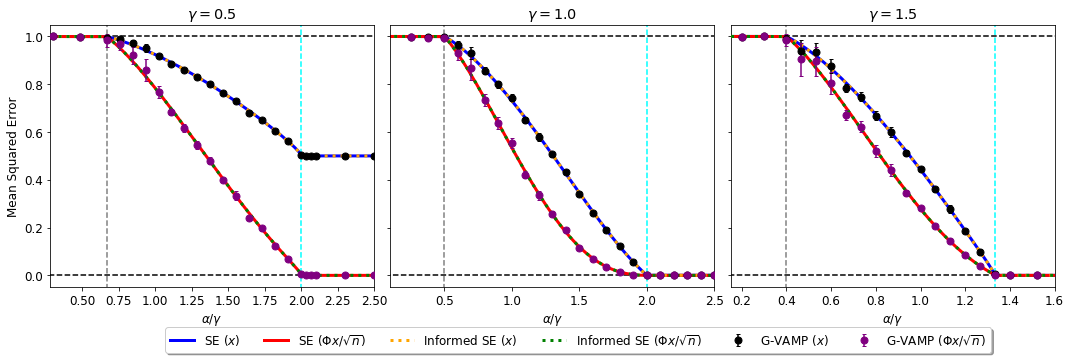

In [5]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1,3,figsize=(18,5),sharey=True)
limits_inf = [0.28,0.1,0.15]
limits_sup = [2.5,2.5,1.6]

for (i_g,gamma) in enumerate(gammas):
    ax = axes[i_g]
    ax.set_xlim(limits_inf[i_g], limits_sup[i_g])
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$\alpha/\gamma$')
    if i_g == 0:
        ax.set_ylabel(r'Mean Squared Error')
    ax.set_title(r'$\gamma = $'+str(gamma))
    alpha_WR = 1./(1.+gamma)
    alpha_PR = min(2.,2./gamma)
    ax.plot([alpha_WR,alpha_WR],[-0.5,1.5],linestyle='--',color='grey',zorder=0)
    ax.plot([alpha_PR,alpha_PR],[-0.5,1.5],linestyle='--',color='cyan',zorder=0)
    ax.plot([0.,3],[1.,1.],linestyle='--',color='black',zorder=0)
    ax.plot([0.,3],[0.,0.],linestyle='--',color='black',zorder=0)

    if gamma != 1:
        ax.plot(alphas_se[i_g],mses_uninformed_z[i_g], label = r"SE $(x)$",zorder = 2, linewidth=3, color = 'blue')
        ax.plot(alphas_se[i_g],mses_uninformed_x[i_g], label = "SE $(\Phi x/\sqrt{n})$",zorder = 2, linewidth=3, color = 'red')
        ax.plot(alphas_se[i_g],mses_informed_z[i_g], label = r"Informed SE $(x)$",zorder = 3, linewidth=3, color = 'orange',linestyle='dotted')
        ax.plot(alphas_se[i_g],mses_informed_x[i_g], label = r"Informed SE $(\Phi x/\sqrt{n})$",zorder = 3, linewidth=3, color = 'green',linestyle='dotted')
    else: #We have to separate the gamma = 1 case
        ax.plot(alphas_se[i_g]['uninformed'],mses_uninformed_z[i_g], label = r"SE $(x)$",zorder = 2, linewidth=3, color = 'blue')
        ax.plot(alphas_se[i_g]['uninformed'],mses_uninformed_x[i_g], label = r"SE $(\Phi x/\sqrt{n})$",zorder = 2, linewidth=3, color = 'red')
        ax.plot(alphas_se[i_g]['informed'],mses_informed_z[i_g], label = r"Informed SE $(x)$",zorder = 3, linewidth=3, color = 'orange',linestyle='dotted')
        ax.plot(alphas_se[i_g]['informed'],mses_informed_x[i_g], label = r"Informed SE $(\Phi x/\sqrt{n})$",zorder = 3, linewidth=3, color = 'green',linestyle='dotted')
    
    if alphas_gvamp[i_g] != [] and not(alphas_gvamp[i_g] is None):
        ax.errorbar(alphas_gvamp[i_g], mses_gvamp_mean_all_z[i_g], yerr = mses_gvamp_std_all_z[i_g], label = r"G-VAMP $(x)$", zorder = 4, fmt='o', markersize=7,capsize = 2, color = 'black')
        ax.errorbar(alphas_gvamp[i_g], mses_gvamp_mean_all_x[i_g], yerr = mses_gvamp_std_all_x[i_g], label = r"G-VAMP $(\Phi x/\sqrt{n})$", zorder = 4, fmt='o', markersize=7,capsize = 2, color = 'purple')
#We shrink the axis and add the legend below
for ax in axes:
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

axes[0].legend(loc='upper center', bbox_to_anchor=(1.63, -0.13),
          ncol=6, fancybox=True, shadow=True)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig("mse_complex_product_gaussians.pdf",bbox_inches = 'tight')